In [1]:
from audiolazy import *

In [2]:
a = Stream(2,-2,-1)
b = Stream(3,7,5,4)

In [3]:
c=a+b

In [4]:
c

In [5]:
c.take(15)

[5, 5, 4, 6, 1, 6, 7, 2, 2, 9, 3, 3, 5, 5, 4]

In [6]:
a=Stream([1,2,3,2,1])
b=Stream(3,7,5,4)
c=a+b
c

In [7]:
list(c)

[4, 9, 8, 6, 4]

In [11]:
filt=1-z**-1
filt

1 - z^-1

In [12]:
data = filt([0.1,0.2,0.4,0.3,0.2,-0.1,-0.3,-0.2])
data

In [13]:
list(data)

[0.1,
 0.1,
 0.2,
 -0.10000000000000003,
 -0.09999999999999998,
 -0.30000000000000004,
 -0.19999999999999998,
 0.09999999999999998]

In [16]:
rate = 44100 # Sampling rate, in samples/second
s, Hz = sHz(rate) # Seconds and hertz
ms = 1e-3 * s
note1 = karplus_strong(440 * Hz) # Pluck "digitar" synth
note2 = zeros(300 * ms).append(karplus_strong(880 * Hz))
notes = (note1 + note2) * .5
sound = notes.take(int(20 * s)) # 2 seconds of a Karplus-Strong note
with AudioIO(True) as player: # True means "wait for all sounds to stop"
    player.play(sound, rate=rate)

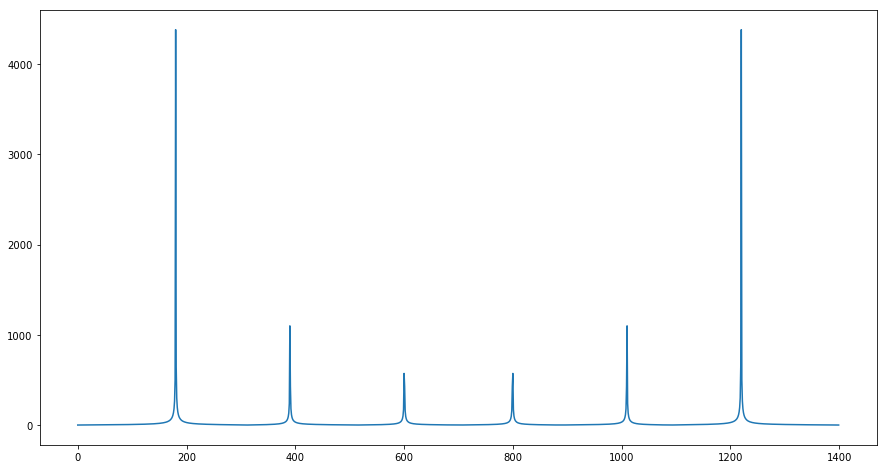

In [24]:
'''傅立叶变换(np.fft)'''

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

x = np.linspace(0,1 , 1400) #最后一个参数只要大于1200就可以(奈奎斯特采样定理:采样频率要大于信号频率2倍)
wave = 7*np.sin(2*np.pi*180*x) + 2.8*np.sin(2*np.pi*390*x)+5.1*np.sin(2*np.pi*600*x)#+ np.cos(2*np.pi*1000*x)
### 傅立叶变换 ###
transformed = np.fft.fft(wave)
### 逆傅立叶变换 ###
#print(np.all(np.abs(np.fft.ifft(transformed)-wave)<10**(-9)))
#plt.plot(transformed.real)              # 注意，fft变换结果是复数，要取实部
plt.figure(figsize=(15,8))
plt.plot(np.arange(len(transformed)) , np.abs(transformed.imag))
#plt.plot(wave)
# plt.show()

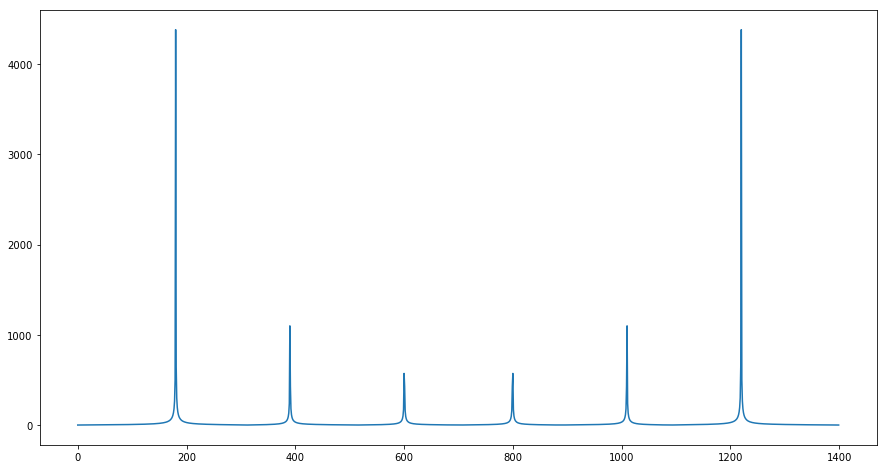

In [25]:
plt.figure(figsize=(15,8))
plt.plot(np.arange(len(transformed)) , np.abs(transformed.imag))

In [36]:
transformed

array([3.97903932e-12+0.j        , 9.99966153e-05-0.0445618j ,
       4.00018214e-04-0.08913023j, ..., 9.00160110e-04+0.13371191j,
       4.00018214e-04+0.08913023j, 9.99966149e-05+0.0445618j ])

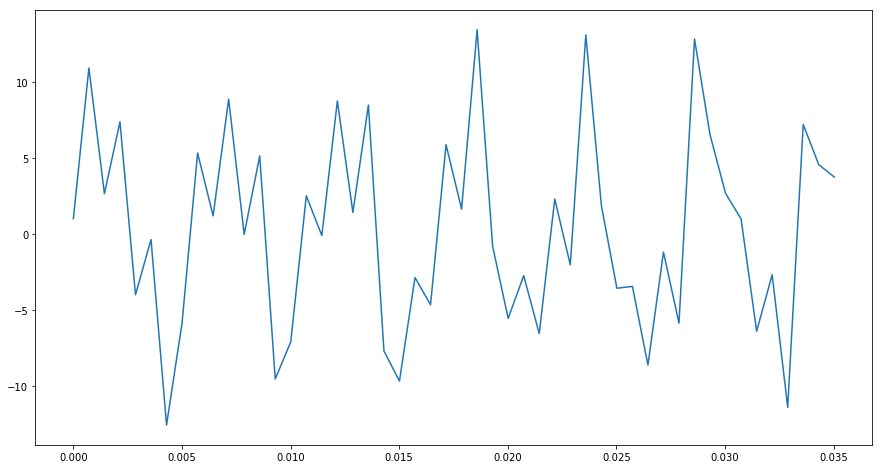

In [4]:
plt.figure(figsize=(15,8))
plt.plot(x[:50] , wave[:50])

In [32]:
np.arange(len(transformed))

array([   0,    1,    2, ..., 1397, 1398, 1399])